In [13]:
from mace.calculators import mace_mp
from ase.io import read
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [11]:
mace_calc = mace_mp(device="cuda", default_dtype="float32")
finetuning_mace_calc = mace_mp(
    model="mace_gold_odac_v1_base.model",
    device="cuda",
    default_dtype="float32",
)

Using local medium Materials Project MACE model for MACECalculator /home/hyunsoo/VScodeProjects/mace/mace/calculators/foundations_models/2023-12-03-mace-mp.model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


In [27]:
test_atoms_list = read(
    "dataset/gold-odac-2024/v1/test.xyz", ":"
)  # TODO: val vs test, v0 vs v1
collections = []
for atoms in tqdm(test_atoms_list):
    # get gas and structure
    tag = atoms.get_tags()
    frame = atoms[tag == 0]
    gas = atoms[tag == 1]
    assert str(gas.symbols) in ["H2O", "CO2"]
    pred_gas_e = finetuning_mace_calc.get_potential_energy(gas)
    print(atoms.info["DFT_E_gas"], pred_gas_e)

  1%|▏         | 4/300 [00:00<00:10, 28.96it/s]

-22.965173193500053 -22.720104217529297
-22.965173193500053 -22.720108032226562
-22.965173193500053 -22.720104217529297
-22.965173193500053 -22.720104217529297
-22.965173193500053 -22.72010040283203


  3%|▎         | 10/300 [00:00<00:12, 23.94it/s]

-22.965173193500053 -22.72010040283203
-14.226161695059131 -14.11514663696289
-14.226161695059131 -14.115144729614258
-14.226161695059131 -14.115141868591309
-14.226161695059131 -14.115138053894043


  4%|▍         | 13/300 [00:00<00:12, 23.27it/s]

-14.226161695059131 -14.11514663696289
-14.226161695059131 -14.115145683288574
-22.97060424093202 -22.725852966308594
-22.97060424093202 -22.72585678100586
-22.97060424093202 -22.72585105895996


  6%|▋         | 19/300 [00:00<00:11, 23.89it/s]

-22.97060424093202 -22.725852966308594
-22.97060424093202 -22.725852966308594
-22.97060424093202 -22.72585678100586
-14.230164500652034 -14.117775917053223
-14.230164500652034 -14.117782592773438


  8%|▊         | 25/300 [00:01<00:11, 24.04it/s]

-14.230164500652034 -14.117783546447754
-14.230164500652034 -14.117776870727539
-14.230164500652034 -14.117782592773438
-14.230164500652034 -14.117774963378906
-22.976299434911382 -22.732820510864258


  9%|▉         | 28/300 [00:01<00:11, 23.25it/s]

-22.976299434911382 -22.73282241821289
-22.976299434911382 -22.732820510864258
-22.976299434911382 -22.732820510864258
-22.976299434911382 -22.732816696166992
-22.976299434911382 -22.732818603515625


 11%|█▏        | 34/300 [00:01<00:11, 23.38it/s]

-14.236641029229524 -14.12486457824707
-14.236641029229524 -14.124871253967285
-14.236641029229524 -14.12486457824707
-14.236641029229524 -14.124865531921387
-14.236641029229524 -14.124869346618652


 13%|█▎        | 40/300 [00:01<00:11, 23.01it/s]

-14.236641029229524 -14.12486457824707
-22.976277185714785 -22.735042572021484
-22.976277185714785 -22.73504066467285
-22.976277185714785 -22.73504066467285
-22.976277185714785 -22.73504066467285


 15%|█▌        | 46/300 [00:01<00:10, 23.89it/s]

-22.976277185714785 -22.73504066467285
-22.976277185714785 -22.73504066467285
-14.23914033747938 -14.127266883850098
-14.23914033747938 -14.127267837524414
-14.23914033747938 -14.127265930175781
-14.23914033747938 -14.127266883850098


 16%|█▋        | 49/300 [00:02<00:11, 22.56it/s]

-14.23914033747938 -14.127265930175781
-14.23914033747938 -14.127269744873047
-22.976212368516 -22.73508071899414
-22.976212368516 -22.73508071899414
-22.976212368516 -22.735082626342773


 18%|█▊        | 55/300 [00:02<00:10, 24.08it/s]

-22.976212368516 -22.73508071899414
-22.976212368516 -22.73508071899414
-22.976212368516 -22.73508071899414
-14.240436815123248 -14.127227783203125
-14.240436815123248 -14.127227783203125
-14.240436815123248 -14.127228736877441


 20%|██        | 61/300 [00:02<00:09, 24.19it/s]

-14.240436815123248 -14.127228736877441
-14.240436815123248 -14.127230644226074
-14.240436815123248 -14.127228736877441
-22.97614495703864 -22.735050201416016
-22.97614495703864 -22.735048294067383


 22%|██▏       | 67/300 [00:02<00:09, 25.33it/s]

-22.97614495703864 -22.735050201416016
-22.97614495703864 -22.735050201416016
-22.97614495703864 -22.735050201416016
-22.97614495703864 -22.735050201416016
-14.240671522910905 -14.127413749694824
-14.240671522910905 -14.127413749694824


 24%|██▍       | 73/300 [00:03<00:09, 25.07it/s]

-14.240671522910905 -14.127413749694824
-14.240671522910905 -14.127412796020508
-14.240671522910905 -14.127413749694824
-14.240671522910905 -14.127413749694824
-22.976471959639014 -22.733444213867188
-22.976471959639014 -22.733489990234375


 26%|██▋       | 79/300 [00:03<00:08, 25.37it/s]

-22.976471959639014 -22.733440399169922
-22.976471959639014 -22.73349952697754
-22.976471959639014 -22.733440399169922
-22.976471959639014 -22.733461380004883
-14.229224212985788 -14.1173095703125


 27%|██▋       | 82/300 [00:03<00:08, 25.44it/s]

-14.229224212985788 -14.117300033569336
-14.229224212985788 -14.11730670928955
-14.229224212985788 -14.117298126220703
-14.229224212985788 -14.117300033569336
-14.229224212985788 -14.117298126220703


 29%|██▉       | 88/300 [00:03<00:08, 23.88it/s]

-22.976215853533017 -22.735088348388672
-22.976215853533017 -22.73508644104004
-22.976215853533017 -22.735088348388672
-22.976215853533017 -22.735088348388672
-22.976215853533017 -22.73508644104004


 31%|███▏      | 94/300 [00:03<00:08, 24.65it/s]

-22.976215853533017 -22.735088348388672
-14.240707451683493 -14.127212524414062
-14.240707451683493 -14.127211570739746
-14.240707451683493 -14.12721061706543
-14.240707451683493 -14.127214431762695


 32%|███▏      | 97/300 [00:04<00:08, 23.96it/s]

-14.240707451683493 -14.127212524414062
-14.240707451683493 -14.127213478088379
-22.976237531102004 -22.73506736755371
-22.976237531102004 -22.73506736755371
-22.976237531102004 -22.73506736755371


 34%|███▍      | 103/300 [00:04<00:08, 23.26it/s]

-22.976237531102004 -22.73506736755371
-22.976237531102004 -22.73506736755371
-22.976237531102004 -22.73506736755371
-14.240769091224015 -14.127508163452148
-14.240769091224015 -14.127508163452148


 36%|███▋      | 109/300 [00:04<00:07, 24.29it/s]

-14.240769091224015 -14.127507209777832
-14.240769091224015 -14.127508163452148
-14.240769091224015 -14.127508163452148
-14.240769091224015 -14.127507209777832
-22.974379040884788 -22.732622146606445


 37%|███▋      | 112/300 [00:04<00:07, 24.17it/s]

-22.974379040884788 -22.73263168334961
-22.974379040884788 -22.732629776000977
-22.974379040884788 -22.732627868652344
-22.974379040884788 -22.732633590698242
-22.974379040884788 -22.732633590698242


 39%|███▉      | 118/300 [00:04<00:07, 23.50it/s]

-14.240929239110852 -14.127015113830566
-14.240929239110852 -14.12701416015625
-14.240929239110852 -14.127015113830566
-14.240929239110852 -14.127015113830566
-14.240929239110852 -14.12701416015625


 41%|████▏     | 124/300 [00:05<00:07, 23.65it/s]

-14.240929239110852 -14.127015113830566
-22.97177475871416 -22.728071212768555
-22.97177475871416 -22.72808074951172
-22.97177475871416 -22.72808074951172
-22.97177475871416 -22.728078842163086


 43%|████▎     | 130/300 [00:05<00:06, 24.41it/s]

-22.97177475871416 -22.728076934814453
-22.97177475871416 -22.728069305419922
-14.24048826239902 -14.127197265625
-14.24048826239902 -14.127195358276367
-14.24048826239902 -14.127195358276367
-14.24048826239902 -14.127196311950684


 44%|████▍     | 133/300 [00:05<00:06, 24.44it/s]

-14.24048826239902 -14.12719440460205
-14.24048826239902 -14.127196311950684
-22.969434560224524 -22.72551727294922
-22.969434560224524 -22.72551918029785
-22.969434560224524 -22.72551155090332


 46%|████▋     | 139/300 [00:05<00:06, 23.95it/s]

-22.969434560224524 -22.72551155090332
-22.969434560224524 -22.72551727294922
-22.969434560224524 -22.72551155090332
-14.239632329512157 -14.127063751220703
-14.239632329512157 -14.127065658569336
-14.239632329512157 -14.127063751220703


 48%|████▊     | 145/300 [00:06<00:06, 24.87it/s]

-14.239632329512157 -14.127065658569336
-14.239632329512157 -14.12706470489502
-14.239632329512157 -14.127065658569336
-22.969951208111045 -22.727214813232422
-22.969951208111045 -22.727214813232422


 50%|█████     | 151/300 [00:06<00:05, 25.41it/s]

-22.969951208111045 -22.727214813232422
-22.969951208111045 -22.727222442626953
-22.969951208111045 -22.727214813232422
-22.969951208111045 -22.72721290588379
-14.239724391025211 -14.127132415771484
-14.239724391025211 -14.127134323120117


 52%|█████▏    | 157/300 [00:06<00:05, 25.51it/s]

-14.239724391025211 -14.127134323120117
-14.239724391025211 -14.127134323120117
-14.239724391025211 -14.127134323120117
-14.239724391025211 -14.127134323120117
-22.976122455709067 -22.735063552856445


 54%|█████▍    | 163/300 [00:06<00:05, 25.04it/s]

-22.976122455709067 -22.735063552856445
-22.976122455709067 -22.735063552856445
-22.976122455709067 -22.735065460205078
-22.976122455709067 -22.735063552856445
-22.976122455709067 -22.735063552856445
-14.239268328910445 -14.127374649047852


 55%|█████▌    | 166/300 [00:06<00:05, 24.49it/s]

-14.239268328910445 -14.127374649047852
-14.239268328910445 -14.127374649047852
-14.239268328910445 -14.127374649047852
-14.239268328910445 -14.127373695373535
-14.239268328910445 -14.127372741699219


 57%|█████▋    | 172/300 [00:07<00:05, 23.72it/s]

-22.976175368666556 -22.735088348388672
-22.976175368666556 -22.73508644104004
-22.976175368666556 -22.73508644104004
-22.976175368666556 -22.73508644104004
-22.976175368666556 -22.73508644104004


 59%|█████▉    | 178/300 [00:07<00:04, 25.03it/s]

-22.976175368666556 -22.73508644104004
-14.239344531802534 -14.126456260681152
-14.239344531802534 -14.126456260681152
-14.239344531802534 -14.126456260681152
-14.239344531802534 -14.126456260681152
-14.239344531802534 -14.126456260681152


 61%|██████▏   | 184/300 [00:07<00:04, 23.35it/s]

-14.239344531802534 -14.126455307006836
-22.976606164560227 -22.734529495239258
-22.976606164560227 -22.734529495239258
-22.976606164560227 -22.73453140258789
-22.976606164560227 -22.73453140258789


 63%|██████▎   | 190/300 [00:07<00:04, 23.81it/s]

-22.976606164560227 -22.73453140258789
-22.976606164560227 -22.73453140258789
-14.240635122393556 -14.127954483032227
-14.240635122393556 -14.127954483032227
-14.240635122393556 -14.12795352935791
-14.240635122393556 -14.127950668334961


 65%|██████▌   | 196/300 [00:08<00:04, 24.24it/s]

-14.240635122393556 -14.127954483032227
-14.240635122393556 -14.127954483032227
-22.974237286255647 -22.73112678527832
-22.974237286255647 -22.73112678527832
-22.974237286255647 -22.731124877929688
-22.974237286255647 -22.731124877929688


 67%|██████▋   | 202/300 [00:08<00:03, 25.27it/s]

-22.974237286255647 -22.73112678527832
-22.974237286255647 -22.73112678527832
-14.23775971967107 -14.125226020812988
-14.23775971967107 -14.125227928161621
-14.23775971967107 -14.125225067138672
-14.23775971967107 -14.125227928161621


 68%|██████▊   | 205/300 [00:08<00:03, 24.96it/s]

-14.23775971967107 -14.125227928161621
-14.23775971967107 -14.125227928161621
-22.958113491974924 -22.710315704345703
-22.958113491974924 -22.710308074951172
-22.958113491974924 -22.710309982299805


 70%|███████   | 211/300 [00:08<00:03, 23.13it/s]

-22.958113491974924 -22.710315704345703
-22.958113491974924 -22.710311889648438
-22.958113491974924 -22.710317611694336
-14.22764375851966 -14.116606712341309


 71%|███████▏  | 214/300 [00:08<00:03, 22.31it/s]

-14.22764375851966 -14.116606712341309
-14.22764375851966 -14.116613388061523
-14.22764375851966 -14.116606712341309
-14.22764375851966 -14.11660099029541
-14.22764375851966 -14.116613388061523


 73%|███████▎  | 220/300 [00:09<00:03, 23.29it/s]

-22.972039162218508 -22.728511810302734
-22.972039162218508 -22.728513717651367
-22.972039162218508 -22.728513717651367
-22.972039162218508 -22.728511810302734
-22.972039162218508 -22.7285213470459


 75%|███████▌  | 226/300 [00:09<00:03, 24.11it/s]

-22.972039162218508 -22.728513717651367
-14.239408080387172 -14.12649154663086
-14.239408080387172 -14.126493453979492
-14.239408080387172 -14.12649154663086
-14.239408080387172 -14.12649154663086


 76%|███████▋  | 229/300 [00:09<00:02, 24.36it/s]

-14.239408080387172 -14.126493453979492
-14.239408080387172 -14.12649154663086
-22.97151387941773 -22.728097915649414
-22.97151387941773 -22.728105545043945
-22.97151387941773 -22.728099822998047
-22.97151387941773 -22.72809410095215


 79%|███████▉  | 238/300 [00:09<00:02, 24.17it/s]

-22.97151387941773 -22.72810173034668
-22.97151387941773 -22.728099822998047
-14.240123541118887 -14.126954078674316
-14.240123541118887 -14.126954078674316
-14.240123541118887 -14.126955032348633
-14.240123541118887 -14.126954078674316


 81%|████████▏ | 244/300 [00:10<00:02, 24.24it/s]

-14.240123541118887 -14.126955032348633
-14.240123541118887 -14.126955032348633
-22.967345192906745 -22.72132682800293
-22.967345192906745 -22.721328735351562
-22.967345192906745 -22.72132682800293
-22.967345192906745 -22.72132682800293


 83%|████████▎ | 250/300 [00:10<00:02, 24.57it/s]

-22.967345192906745 -22.72132682800293
-22.967345192906745 -22.721332550048828
-14.223125150917694 -14.111743927001953
-14.223125150917694 -14.111750602722168
-14.223125150917694 -14.111751556396484
-14.223125150917694 -14.111743927001953


 84%|████████▍ | 253/300 [00:10<00:01, 24.82it/s]

-14.223125150917694 -14.111750602722168
-14.223125150917694 -14.111743927001953
-22.975877276171797 -22.733549118041992
-22.975877276171797 -22.733545303344727
-22.975877276171797 -22.733545303344727


 86%|████████▋ | 259/300 [00:10<00:01, 23.46it/s]

-22.975877276171797 -22.733545303344727
-22.975877276171797 -22.73354721069336
-22.975877276171797 -22.733549118041992
-14.240126838922446 -14.12700366973877
-14.240126838922446 -14.12700366973877


 88%|████████▊ | 265/300 [00:11<00:01, 22.94it/s]

-14.240126838922446 -14.12700366973877
-14.240126838922446 -14.12700366973877
-14.240126838922446 -14.127001762390137
-14.240126838922446 -14.12700366973877
-22.976265286933945 -22.73499870300293


 89%|████████▉ | 268/300 [00:11<00:01, 23.25it/s]

-22.976265286933945 -22.734996795654297
-22.976265286933945 -22.734996795654297
-22.976265286933945 -22.734996795654297
-22.976265286933945 -22.734996795654297
-22.976265286933945 -22.734996795654297


 91%|█████████▏| 274/300 [00:11<00:01, 24.03it/s]

-14.24034981464117 -14.127082824707031
-14.24034981464117 -14.127083778381348
-14.24034981464117 -14.127082824707031
-14.24034981464117 -14.127082824707031
-14.24034981464117 -14.127082824707031
-14.24034981464117 -14.127082824707031


 93%|█████████▎| 280/300 [00:11<00:00, 23.71it/s]

-22.97616176553056 -22.73508071899414
-22.97616176553056 -22.73508071899414
-22.97616176553056 -22.73508071899414
-22.97616176553056 -22.73508071899414
-22.97616176553056 -22.73508071899414


 95%|█████████▌| 286/300 [00:11<00:00, 24.26it/s]

-22.97616176553056 -22.73508071899414
-14.239701176907603 -14.127662658691406
-14.239701176907603 -14.12766170501709
-14.239701176907603 -14.127663612365723
-14.239701176907603 -14.127662658691406
-14.239701176907603 -14.127662658691406


 97%|█████████▋| 292/300 [00:12<00:00, 24.58it/s]

-14.239701176907603 -14.127662658691406
-22.97619327238513 -22.73506736755371
-22.97619327238513 -22.73506736755371
-22.97619327238513 -22.73506736755371
-22.97619327238513 -22.73506736755371
-22.97619327238513 -22.73506736755371


 99%|█████████▉| 298/300 [00:12<00:00, 22.81it/s]

-22.97619327238513 -22.73506736755371
-14.239388563453597 -14.126523971557617
-14.239388563453597 -14.126521110534668
-14.239388563453597 -14.1265230178833
-14.239388563453597 -14.126523971557617


100%|██████████| 300/300 [00:12<00:00, 23.99it/s]

-14.239388563453597 -14.1265230178833
-14.239388563453597 -14.126522064208984


In [12]:
test_atoms_list = read(
    "dataset/gold-odac-2024/v1/test.xyz", ":"
)  # TODO: val vs test, v0 vs v1
collections = []
for atoms in tqdm(test_atoms_list):
    # get gas and structure
    tag = atoms.get_tags()
    frame = atoms[tag == 0]
    gas = atoms[tag == 1]
    assert str(gas.symbols) in ["H2O", "CO2"]

    # dft energy
    dft_t_e = atoms.info["DFT_E_total"]
    dft_t_e_per_atom = dft_t_e / len(atoms)
    dft_i_e = atoms.info["DFT_E_int"]
    dft_f = atoms.arrays["forces"]

    # mace-mp
    mace_mp_t_e = mace_calc.get_potential_energy(atoms)
    mace_mp_t_e_per_atom = mace_mp_t_e / len(atoms)
    mace_mp_i_e = (
        mace_mp_t_e
        - mace_calc.get_potential_energy(frame)
        - mace_calc.get_potential_energy(gas)
    )
    mace_mp_f = mace_calc.get_forces(atoms)

    # finetuning
    finetuning_t_e = finetuning_mace_calc.get_potential_energy(atoms)
    finetuning_t_e_per_atom = finetuning_t_e / len(atoms)
    finetuning_i_e = (
        finetuning_t_e
        - finetuning_mace_calc.get_potential_energy(frame)
        - finetuning_mace_calc.get_potential_energy(gas)
    )
    finetuning_f = finetuning_mace_calc.get_forces(atoms)

    collections.append(
        {
            "dft_t_e": dft_t_e,
            "dft_t_e_per_atom": dft_t_e_per_atom,
            "dft_i_e": dft_i_e,
            "dft_f": dft_f,
            "mace_mp_t_e": mace_mp_t_e,
            "mace_mp_t_e_per_atom": mace_mp_t_e_per_atom,
            "mace_mp_i_e": mace_mp_i_e,
            "mace_mp_f": mace_mp_f,
            "finetuning_t_e": finetuning_t_e,
            "finetuning_t_e_per_atom": finetuning_t_e_per_atom,
            "finetuning_i_e": finetuning_i_e,
            "finetuning_f": finetuning_f,
        }
    )
df_result = pd.DataFrame(collections)

100%|██████████| 300/300 [03:02<00:00,  1.64it/s]


In [21]:
# df_result_clean = df_result[df_result["dft_i_e"] < 2]  # TODO
df_result_clean = df_result
mae_mace_mp_t_e_per_atom = np.mean(
    np.abs(df_result["dft_t_e_per_atom"] - df_result["mace_mp_t_e_per_atom"])
)
mae_mace_mp_t_e = np.mean(np.abs(df_result["dft_t_e"] - df_result["mace_mp_t_e"]))
mae_mace_mp_i_e = np.mean(
    np.abs(df_result_clean["dft_i_e"] - df_result_clean["mace_mp_i_e"])
)
mae_finetuning_t_e_per_atom = np.mean(
    np.abs(df_result["dft_t_e_per_atom"] - df_result["finetuning_t_e_per_atom"])
)
mae_finetuning_t_e = np.mean(np.abs(df_result["dft_t_e"] - df_result["finetuning_t_e"]))
mae_finetuning_i_e = np.mean(
    np.abs(df_result_clean["dft_i_e"] - df_result_clean["finetuning_i_e"])
)

dft_f = np.concatenate(df_result["dft_f"].values)
mace_mp_f = np.concatenate(df_result["mace_mp_f"].values)
finetuning_f = np.concatenate(df_result["finetuning_f"].values)
pretrain_f_mae = np.mean(np.abs(dft_f - mace_mp_f))
finetuning_f_mae = np.mean(np.abs(dft_f - finetuning_f))

Text(0.95, 0.05, 'mae_mace_mp_t_e_per_atom: 0.028\nmae_finetuning_t_e_per_atom: 0.020\nmae_mace_mp_f: 0.134\nmae_finetuning_f: 0.137')

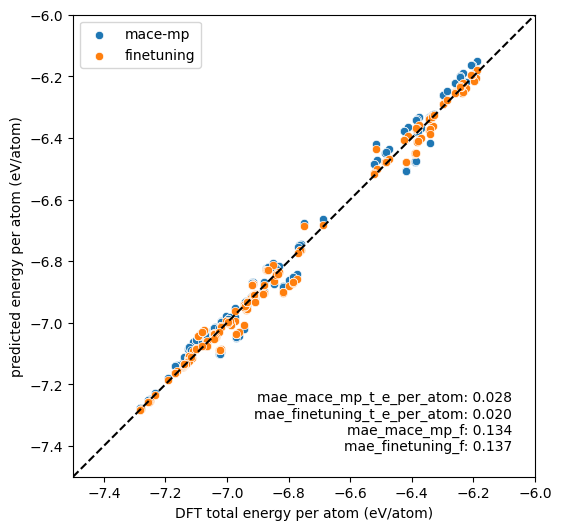

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(
    x="dft_t_e_per_atom",
    y="mace_mp_t_e_per_atom",
    data=df_result,
    ax=ax,
    label="mace-mp",
)
sns.scatterplot(
    x="dft_t_e_per_atom",
    y="finetuning_t_e_per_atom",
    data=df_result,
    ax=ax,
    label="finetuning",
)
ax.set_xlabel("DFT total energy per atom (eV/atom)")
ax.set_ylabel("predicted energy per atom (eV/atom)")
# y = x line
xlim = (-7.5, -6)
ylim = (-7.5, -6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot(xlim, ylim, color="black", linestyle="--")
# aspect ratio
ax.set_aspect("equal")
# annotation mae
ax.text(
    0.95,
    0.05,
    (
        f"mae_mace_mp_t_e_per_atom: {mae_mace_mp_t_e_per_atom:.3f}\n"
        f"mae_finetuning_t_e_per_atom: {mae_finetuning_t_e_per_atom:.3f}\n"
        f"mae_mace_mp_f: {pretrain_f_mae:.3f}\n"  # TODO: fix
        f"mae_finetuning_f: {finetuning_f_mae:.3f}"
    ),
    transform=ax.transAxes,
    ha="right",
    va="bottom",
)

Text(0.95, 0.05, 'mae_mace_mp_i_e: 0.341\nmae_finetuning_i_e: 0.345\n')

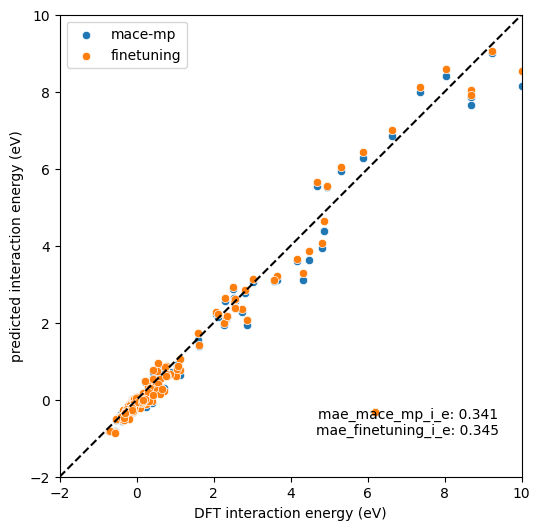

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(
    x="dft_i_e",
    y="mace_mp_i_e",
    data=df_result,
    ax=ax,
    label="mace-mp",
)
sns.scatterplot(
    x="dft_i_e",
    y="finetuning_i_e",
    data=df_result,
    ax=ax,
    label="finetuning",
)
ax.set_xlabel("DFT interaction energy (eV)")
ax.set_ylabel("predicted interaction energy (eV)")
# y = x line
xlim = (-2, 10)
ylim = (-2, 10)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot(xlim, ylim, color="black", linestyle="--")
# aspect ratio
ax.set_aspect("equal")
# annotation mae
ax.text(
    0.95,
    0.05,
    (
        f"mae_mace_mp_i_e: {mae_mace_mp_i_e:.3f}\n"
        f"mae_finetuning_i_e: {mae_finetuning_i_e:.3f}\n"
    ),
    transform=ax.transAxes,
    ha="right",
    va="bottom",
)

In [ ]:
# mace_calc.get_atoms()
mace_calc.models

# 2. Scale, Shift Optimization

In [ ]:
origin_mace_calc = mace_mp(device="cpu", default_dtype="float32", dispersion=False)

In [ ]:
from scipy.optimize import minimize


def optimize_scale_shift(input, atoms_list, weight_e=1.0, weight_f=0.0):
    scale, shift = input
    mace_model = mace_mp().models[0]
    mace_model.scale_shift.scale = torch.tensor(scale)
    mace_model.scale_shift.shift = torch.tensor(shift)
    torch.save(mace_model, "tmp.model")
    mace_calc = mace_mp(
        "tmp.model", device="cpu", default_dtype="float32", dispersion=False
    )
    diff_e = []
    diff_f = []
    for atoms in tqdm(atoms_list):
        y_e = atoms.info["DFT_E_int"]
        y_f = atoms.arrays["REF_forces"]
        x_e = mace_calc.get_potential_energy(atoms)
        x_f = mace_calc.get_forces(atoms)
        diff_e.append(np.abs(y_e - x_e))
        diff_f.append(np.abs(y_f - x_f).sum())
    mae_e = np.mean(diff_e)
    mae_f = np.mean(diff_f)
    loss = weight_e * mae_e + weight_f * mae_f
    print(scale, shift, loss, mae_e, mae_f)
    return loss


initial_guess = (0.7174, 6.774)
result = minimize(
    optimize_scale_shift, initial_guess, args=(test_atoms_list,), method="BFGS"
)

In [ ]:
shifted_mace_calc = mace_mp("tmp.model", device="cuda", default_dtype="float32")
print(shifted_mace_calc.models[0].scale_shift.scale)
print(shifted_mace_calc.models[0].scale_shift.shift)
collections = []
for atoms in tqdm(test_atoms_list):
    # dft energy
    dftd3_int_e = atoms.info["DFTD3_E_int"]
    # mace-mp
    # mace_mp_d3_int_e = mace_calc.get_potential_energy(atoms)
    # shifted mace-mp
    shifted_mace_mp_d3_int_e = shifted_mace_calc.get_potential_energy(atoms)
    collections.append(
        {
            "dftd3_int_e": dftd3_int_e,
            "shifted_mace_mp_d3_int_e": shifted_mace_mp_d3_int_e,
        }
    )
df_result = pd.DataFrame(collections)

In [ ]:
mae = np.mean(np.abs(df_result["dftd3_int_e"] - df_result["shifted_mace_mp_d3_int_e"]))
mae

In [ ]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(
    x="dftd3_int_e",
    y="shifted_mace_mp_d3_int_e",
    data=df_result,
    ax=ax,
    label="shifted mace-mp-d3",
)
ax.set_xlabel("DFTD3 interaction energy (eV)")
ax.set_ylabel("interaction energy (eV)")
# y = x line
# xlim = (-7.5, -6)
# ylim = (-7.5, -6)